# Support Vector Machines - Explaining Hyper Parameters

SVM modeli regresyon ile de calisir fakat bu modeldense regresyonla cok daha iyi calisan pek cok model var, bu yuzden biz SVM'i regresyon ile denemeyecegiz egitim alirken. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (16,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv("mouse_viral_study.csv")

In [ ]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


Ilk 2 feature medicine yani iki farkli ilaci temsil ediyor, Virus Present ise bizim target feature imiz. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Separating Hyperplane Manually

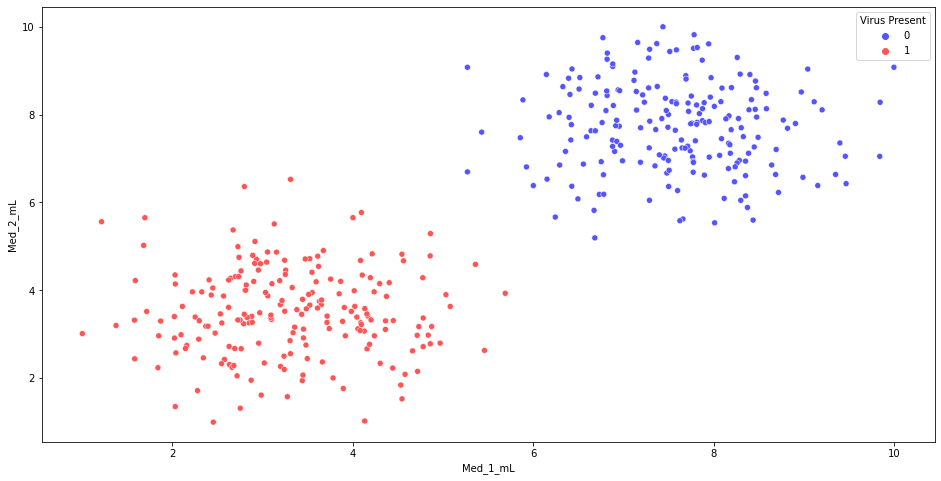

In [ ]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic');

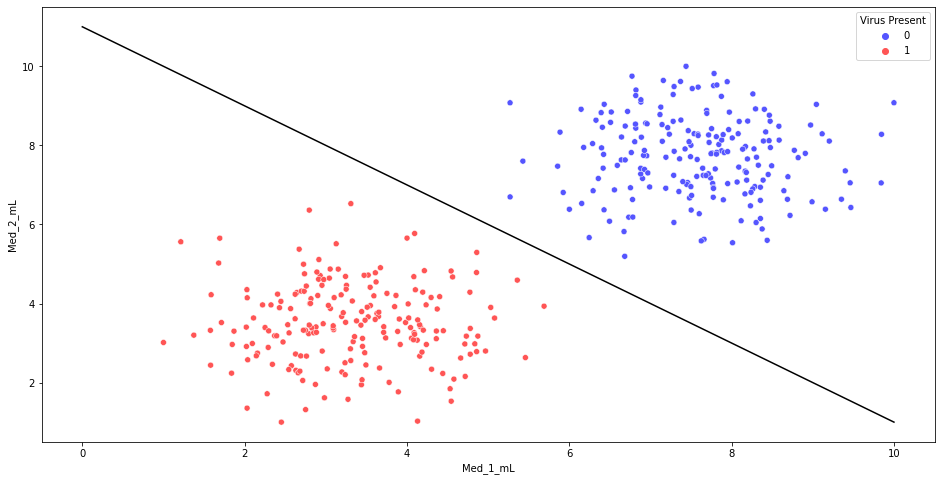

In [ ]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black');

yukarida gordugumuz cizgi yani line, negative line

## SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC

SVC = Support Vector Classifier
Parametreler:
1. C parametresi - Regularization parameter. C degeri kuculdukce regularizasyon artar. Kucuk olmasi bizi overfittingden uzaklastirirken, buyuk olmasi bizi overfitting e goturur. 
* not alpha ve lambda ayni sey - grid search de kullandigimiz fakat lambdayi biz pythonda fonk olarak da kullandigimiz icin kafa karisikligi olmasin diye sadece alpha diyoruz. 
2. kernel bizim en onemli parametrelerimizden, SVM'nin gercekten calismaya basladigi nokta kernel noktasi. Default degeri ve en cok kullanilan ise 'rbf'. Diger kernel turlerine help'deki aciklamadan bakabilirsin. Boyut arttirmayi burada yapiyoruz yani. 
3. degree - default degree degerimiz 3, polynomial i inceledigimizde ML'in basindayken orada da degree yi gormustuk. kernel='poly' dedigimizde degree bizim icin onemli bir parametre haline geliyor. Zaten diger kerneller tarafindan ignore edilen bir parametre old aciklamasinda yaziyor. 
4. gamma - kernel'in ardindan modeli overfittingden kurtarmak icin kullandigimiz ikinci en onemli parametremizdir. Gamma dominant bir parametredir. Bazen gammaya oyle yuksek degerler veriririz ki C ile bu overfitting i duzeltirken ya da duzeltebilecekken, C'yi hukumsuz hale getirir. Oyle ki C'yi ne kadar kuculturseniz kucultun overfittingden kurtulamayacak hale getirebilir. O yuzden gamma dominanttir, yuksek bir rakam alirsa C'nin de butun ozelligini elinden alir. O yuzden gamma'nin da yuksek olmasi bizim istedigimiz bir sey degil. 
* gamma bizim egrimiz ile en uc noktadaki gozlemlerimiz arasindaki esit mesafeyi belirler, ancak gamma sayisi yuksek oldugunda bu dogrusal olmak yerine ovalleserek gozlemlerimizi sarmaya hatta onlari yakinlastirip alani iyice daraltmaya kadar gidebilir. gamma nin bu ozelliginden birbiri ile cakismis ust uste gecmis farkli kategorilerdeki gozlemleri ayristirmada yararlaniyoruz. Bunu 3 boyutlu olarak dusunmemiz lazim, yani alanini belirleyebiliyoruz. Ne kadar dar tutarsak hard oluyor, hem dogrusal hem de dairesel olarak. Hataya musade edip birkac tanesini de yanlis tahmin etmesine yol acacak sekilde ne kadar genis cizersek, yeni gelecek gozlemimizin dar alanin disinda kalmasina engel olarak modelin tahminde zorlanmasinin onune gecmek icin, traini muhtesem tahmin ederken testte dusuk scorelar almasin diye, yani overfittingin onune gecmek icin bu sekilde yapacagiz. 
5. probability - default u False. 


In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

* Distance based modellerde mutlaka ama mutlaka scaling islemi yapiyoruz aksi takdirde bu manipulasyon yaratir. 
* Hyper parameterlariyla oynamasi en zor olan model diyebiliriz SVM modeli icin bu yuzden cok dikkat etmemiz gereken 2 husus var.
> 1. Scaling
> 2. Grid Search
* Grid Search'un en guzel cevap verdigi algoritma SVM algoritmasidir. 

In [ ]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [ ]:
model = SVC(kernel='linear', C=1)
# C=0.01 dedigimizde mesela margin genisliyor, son noktalarin daha gerisindeki noktalara dogru kayiyor, bizim de istedigimiz bu bias eklemis oluyoruz 
# C degerini 1'den daha buyuk hangi degeri girersen gir sonuc 1 ile ayni olur, son nokta 1 cunku
model.fit(X, y)

SVC(C=1, kernel='linear')

hyperparameter lari manuel olarak ayarlamasi zor bir model, ancak grid search e cok iyi cevap verdigi icin biz bu modelde grid search ne diyorsa onu yapacagiz yani best params lari kullanacagiz. 

In [ ]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

svm_margin_plot.py dosyasini ayni dizinde ekle ondan sonra calistirabilirsin. Genel olarak da kullanmak istedigim bir fonksiyon uretip, bunu py dosyasinda kaydedip bu sekilde dosyadan fonksiyonu getir dedigimde kendi jupyter imde onu bu sekilde calistirabilirim. 

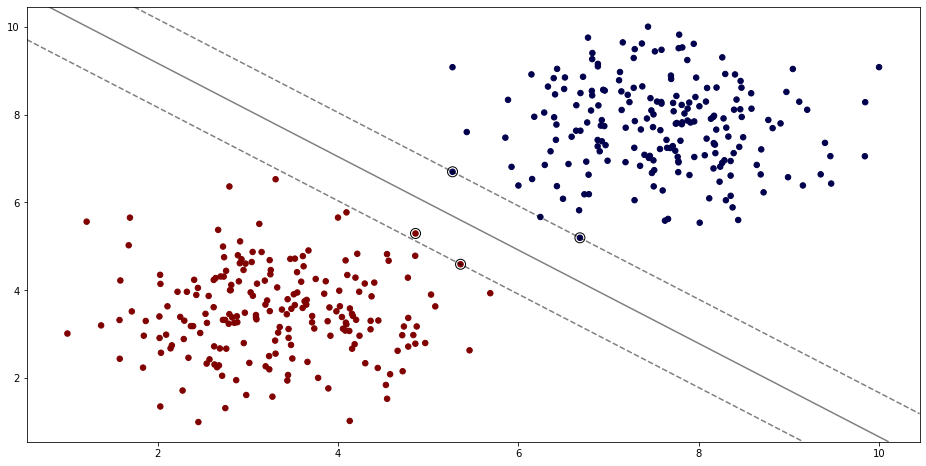

In [ ]:
plot_svm_boundary(model,X,y)

yukarida hard marjin old nu goruyoruz cunku hataya yer birakmayacak sekilde sinir noktalarinin uzerinden gecerek cizgi cekmis. Son noktalara degiyorsa hic hataya yer vermeyecek sekilde, buradan hard margin old nu anliyoruz. 

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [ ]:
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

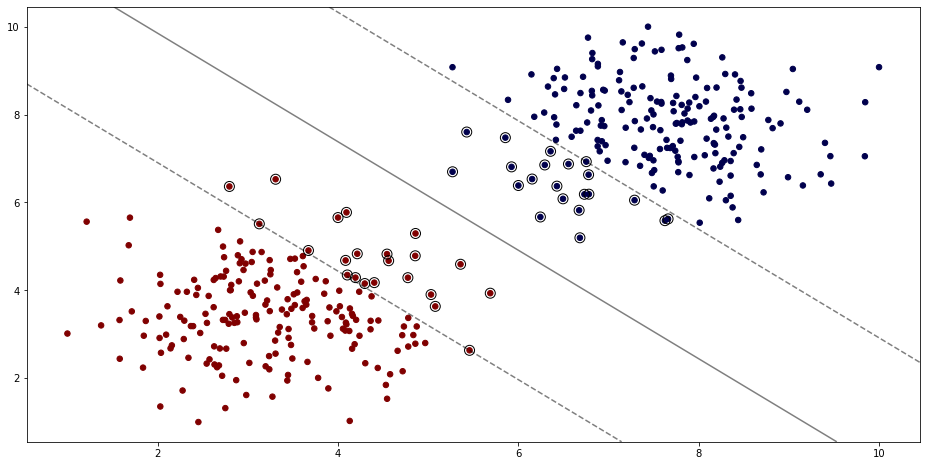

In [ ]:
plot_svm_boundary(model,X,y)

### Kernel

Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

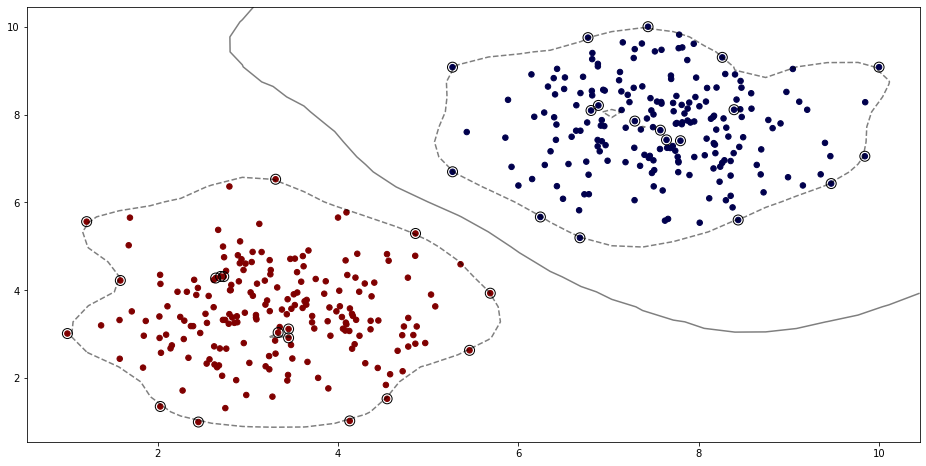

In [ ]:
model = SVC(kernel='rbf', C=10, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

* Burada yine bir hard margin soz konusu, gammamiz icerideki ince cizgi, noktalarin uzerinden gecen yuvarlakli alan. 
* gamma nin default degeri onceden 'auto' ymus ancak su an 'scale'. scale ile auto arasindaki fark ise auto= 1/n_features yani feature sayisi; scale= 1/(n_features * variance) (variance icin X.var() kullanilmis aciklamada) 
* gamma gucluyse C ne kadar kucuk olursa olsun hukumsuz hale geliyor, ancak gamma kucuk bir rakamsa C onu kontrol edebiliyor, hatta yok bile edebiliyor 

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

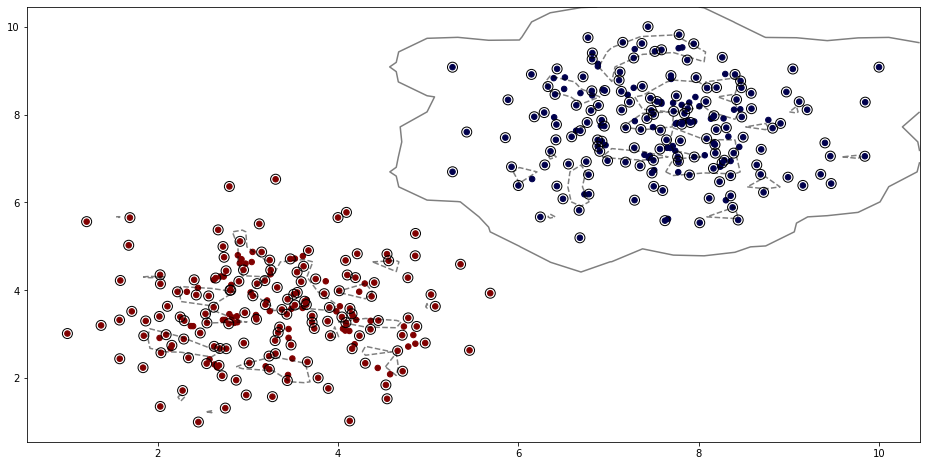

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

The sigmoid kernel was quite popular for support vector machines due to its origin
from neural networks. Although it is known that the kernel matrix may not be positive
semi-definite (PSD), other properties are not fully studied. In this paper, we discuss
such non-PSD kernels through the viewpoint of separability. Results help to validate
the possible use of non-PSD kernels. One example shows that the sigmoid kernel matrix
is conditionally positive definite (CPD) in certain parameters and thus are valid kernels
there. However, we also explain that the sigmoid kernel is not better than the RBF kernel
in general

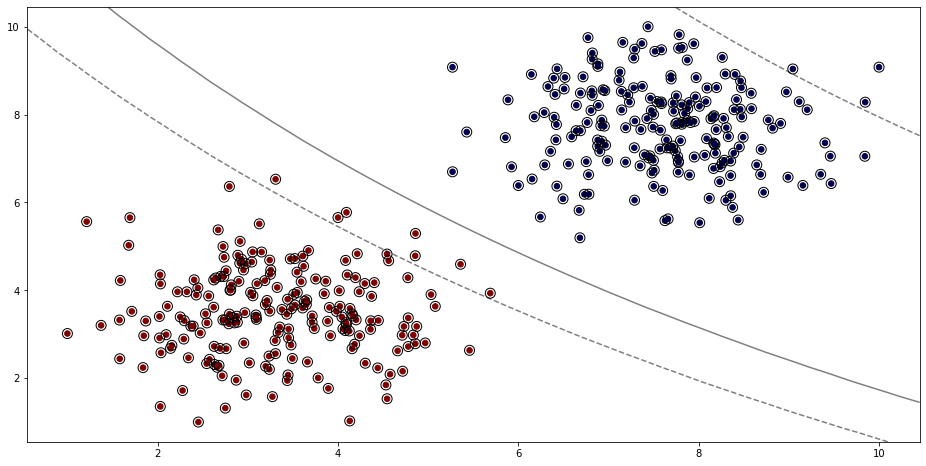

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

bu modelde sigmoid anlamsiz bir sonuc ortaya cikartiyor 

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

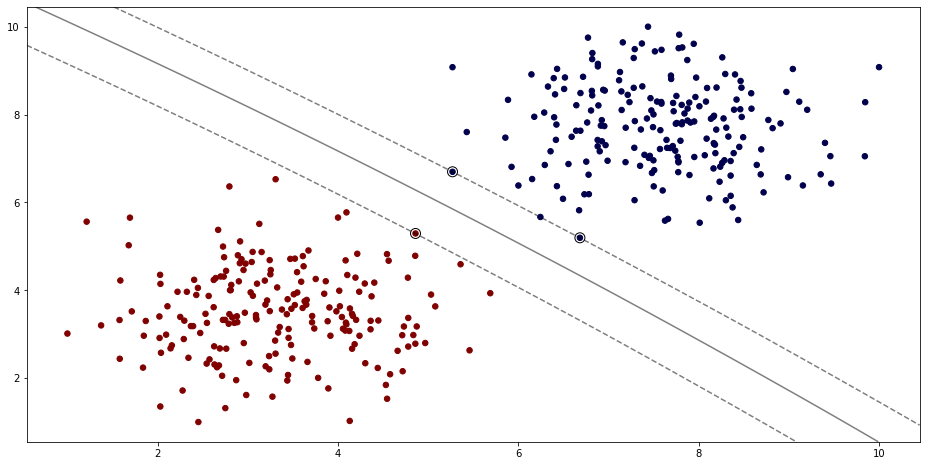

In [ ]:
model = SVC(kernel='poly', C=0.1, degree=3)
model.fit(X, y)
plot_svm_boundary(model,X,y)

degree=1 linear bir margin veriyor, 2 de linear e yakin oluyor. degree=3 ten itibaren polinomlasmaya basliyor.

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [ ]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [ ]:
grid.best_score_

1.0

best score un 1 cikmasi, best params degerleri ile modelin %100 dogru tahmin yaptigini gosteriyor. best_score r2 degerini veriyor diye biliyoruz ama burada bir soru isareti var baska bir score da olabilir ama muhtemelen r2.  

In [ ]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}